# 연속형 확률변수

### 연속형 확률변수
- 확률변수가 취할 수 있는 값이 연속적인 확률변수
- 특정 값을 취하는 확률은 정의되지 않음
- 확률변수가 어느 구간에 들어가는 확률을 정의



- [예] 룰렛:

    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수일수록 나오기 쉬워지는 불공정한 구조
    - 0.5라는 값을 취할 확률은 0
    - 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0


### 확률밀도함수


- 확률변수가 취할 수 있는 값은 구간 [a, b]
- 확률은 확률밀도함수(PDF) 또는 밀도함수 𝑓(𝑥)에 의해 정의


- 어떤 특정 값을 취하는 확률로는 정의되지 않음
    - 𝑓(𝑥) ≠𝑃(𝑋=𝑥) 
    
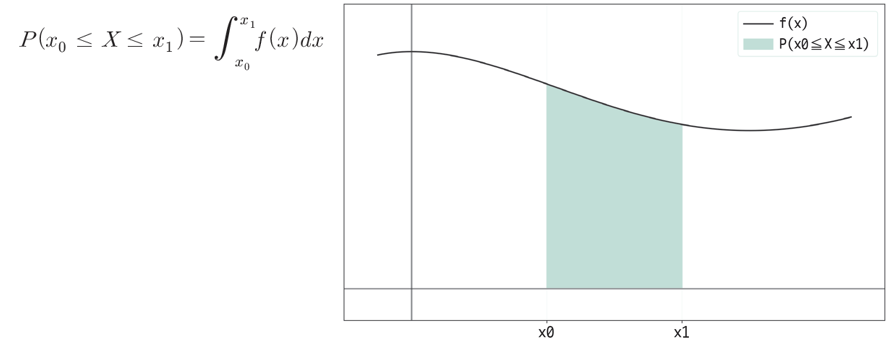
- 이 적분은 밀도함수 f(x)와 x축, 그리고 두 직선 x=x0, x=x1로 둘러싸인 영역의 면적으로 해설할 수 있고 그림에서 칠해진 면적이 확률P임


### 불공정한 룰렛을 예로 들어 코드를 구현

- [예] 룰렛:
    - 취할 수 있는 값은 0부터 1사이의 실수로 가정 - 연속형 데이터(연속형확률)
    - 큰 수일수록 나오기 쉬워지는 불공정한 구조
        - 2x 의 결과를 취한다
    - 0.5라는 값을 취할 확률은 0임(연속형확률분포의 특징)
        - 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 불공정한 룰렛이 취할 수 있는 값의 구간을 정의
x_range = np.array([0,1])

- x_range를 정의역으로 하는 밀도 함수를 구현 
    - 불공정한 룰렛은 큰 값일수록 나오기 쉽기 때문에 아래와 같은 밀도함수로 정의하기로 하자    

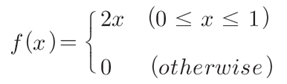

In [5]:
x_range

array([0, 1])

In [6]:
# 불공정한 룰렛의 밀도함수 f 정의
def f(x) :
    if x_range[0] <= x <= x_range[1] :
        return 2*x
    else :  # 취할 수 없는 값
        return 0

In [7]:
# 아래의 식은 0.4가 나올 확률이 아니다 
# 연속형이므로 두 구간 경계위치값을 옆 수식으로 구해 면적을 그린 후 해당 면적을 적분으로 구하면 해당 값이 두 구간이 나올 확률이 됨
f(0.4)

0.800

In [8]:
# 확률분포 [x_range, f] , 연속형 확률변수 X
X = [x_range, f]

- 밀도함수 f(x)를 그래프로 그림
    - 확률의 이미지를 쉽게 전달하기위해 f(x)와 x축, 두 직선=0.4, x=0.6의 영역에 색을 적용

#### 그래프 결과
- (불공정한 룰렛이 0.4부터 0.6사이의 값을 취할 확률)

(-0.100, 1.100)

(-0.200, 2.100)

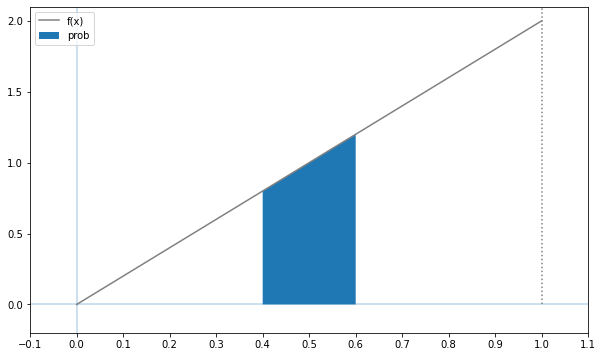

In [9]:
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 수평선
# hlines(y, xmin, xmax, color=,,,)
ax.hlines(0, -0.2, 1.2, alpha=0.3) 
# 범위가 0~1까지이므로 +- 0.2만큼 확장한 수평선을 그림

# 수직선(좌표 최소 최대에)
# ax.vlines(x, ymin, ymax, alpha=)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 직선(확률함수를 통해 계산된 값을 활용) 그리기
# x축 값 : xs
# xs에 대응하는 y축 값
# 불공정한 룰렛의 확률함수 f(x)
ys = [f(x) for x in xs]
ax.plot(xs, ys, label='f(x)', color='gray') 
# 불공정한 룰렛이 취할 수 있는 모든 값의 확률을 직선으로 표현

# 불공정한 룰렛에 대하여 값이 0.4에서 0.6사이로 나올 확률을 도식화
# 0.4부터 0.6 까지 x좌표를 준비
xs_p = np.linspace(0.4, 0.6, 100)
ys_p = [f(x) for x in xs_p]

# 위 두 값의 처음과 마지막 데이터를 활용해 사각형의 영역을 칠 함
ax.fill_between(xs_p, ys_p, label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [10]:
xs

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.152, 0.162, 0.172,
       0.182, 0.192, 0.202, 0.212, 0.222, 0.232, 0.242, 0.253, 0.263,
       0.273, 0.283, 0.293, 0.303, 0.313, 0.323, 0.333, 0.343, 0.354,
       0.364, 0.374, 0.384, 0.394, 0.404, 0.414, 0.424, 0.434, 0.444,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.556, 0.566, 0.576, 0.586, 0.596, 0.606, 0.616, 0.626,
       0.636, 0.646, 0.657, 0.667, 0.677, 0.687, 0.697, 0.707, 0.717,
       0.727, 0.737, 0.747, 0.758, 0.768, 0.778, 0.788, 0.798, 0.808,
       0.818, 0.828, 0.838, 0.848, 0.859, 0.869, 0.879, 0.889, 0.899,
       0.909, 0.919, 0.929, 0.939, 0.949, 0.96 , 0.97 , 0.98 , 0.99 ,
       1.   ])

### plt.plt.fill_between()   예시


Text(0.5, 0, 'X-Label')

Text(0, 0.5, 'Y-Label')

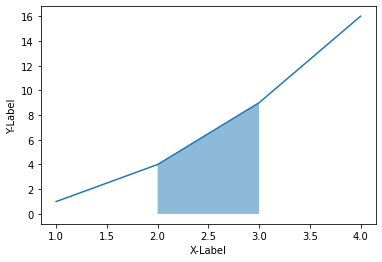

In [11]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(x, y)
plt.xlabel('X-Label')
plt.ylabel('Y-Label')

# fill_between() 사용
plt.fill_between(x[1:3], y[1:3],alpha=0.5)
plt.show()

### 확률의 성질 


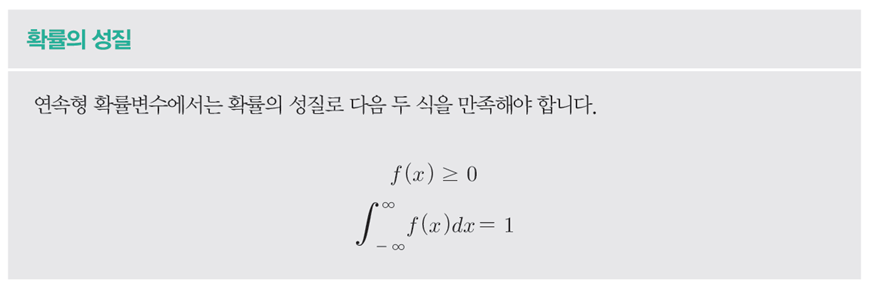

- 첫번째 성질 : 함수 f(x)의 반환값 0보다 같거나 커야한다
    - 위 성질을 확인하기 위해 minimize_scalar 함수 사용
    - minimize_scalar(함수) : 함수를 실행한 결과값이 최소가되는 x값과 최소결과 y를 반환

In [12]:
# minimize_scalar 사용 예제
from scipy.optimize import minimize_scalar

def func(x) :
    return (x-1.5) ** 2 + 0.5

# 위에서 생성한 함수 func에 대해 어떤 x가 들어왔을 때 함수식의 결과가 최소가 되고 결과의 최소값은 얼마인지?
res = minimize_scalar(func)
opt_x, opt_y = res.x, res.fun

print('x: {}, y: {}'.format(opt_x, opt_y))

# 위 func 함수에 x값 1.5를 전달하면 결과값 y 0.5로 최솟값이 나옴
# 반환되는 최소값은 .fun 속성에, 최소 반환값을 만들어내는 x값은 .res 속성에 저장되어 있음

x: 1.5, y: 0.5


In [13]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [14]:
# 위 함수가 반환하는 최소값 확인 : 
# 0을 반환하므로 첫번째 연속형 확률변수의 확률의 성질을 만족함

from scipy.optimize import minimize_scalar

# 함수를 사용해서  최솟값은 fun이라는 인스턴스 변수에 저장되어 있음
res = minimize_scalar(f)

# 함수 f(x) 의 결과값으로 나타나는 최솟값은 0이고, 0을 만들어내는 x값은 -1.61803...
print(res.x)
print(res.fun)
f(0)

-1.6180339754913822
0


0

- 위 연산의 확인으로 인해 f(x) >= 0의 연속형 확률변수의 첫번째 확률의 성질이 만족 됨

#### 연속형 확률변수의 두 번째 확률의 성질
![](확률성질2.png)



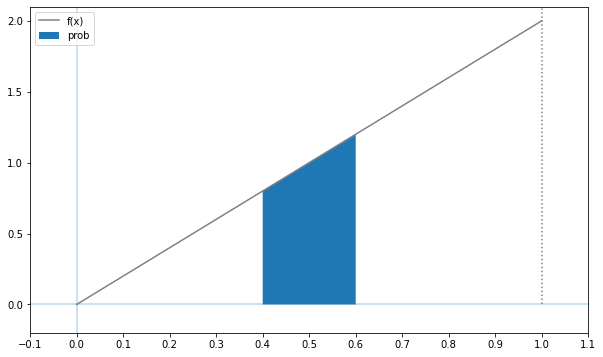

- 두번째 f(x)를 －∞ 부터 ∞ 까지 적분한 결과가 1이라는 것은 위 그림에서 삼각형의 면적이 1이 되는 것과 같다
    - 이 삼각형은 밑변의 길이가 1, 높이가 2 이므로 면적이 1이라는 것을 간단히 알 수 있음

### quad() : 수치적분 함수

- **수치적분(numerical integration)은** 함수를 아주 작은 구간으로 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법이다. 
- Scipy의 integrate 서브패키지의 quad 명령으로 수치적분을 할 수 있다.

- 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
- 첫번째 반환값이 수치 적분으로 얻어진 결과이며, 두번째의 값은 추정 오차

### 무한대 표현
- numpy.inf(+/-)

In [15]:
## 두번째 성질을 적분 계산으로 확인
integrate.quad(f,-np.inf, np.inf)

#  f(x)를 -무한대부터 +무한대까지 적분한 결과가 1 이어야 함 
# 두번째 확률의 성질을 만족

(1.000, 0.000)

- 위 사다리꼴 영역을 적분으로 구하는 식

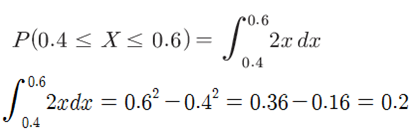

In [16]:
X

[array([0, 1]), <function __main__.f(x)>]

In [17]:
# 확률분포변수 X에 대하여 0.4~0.6이 나올 확률은 0.2
x_set, f = X

# 첫번째 반환 값 적분값 - 첫번째 반환값이 0.2 이므로 확률이 0.2
integrate.quad(f,0.4,0.6)

(0.200, 0.000)

## 불공정한 룰렛의 확률함수 식
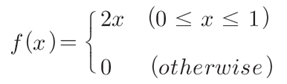

In [18]:
x_range

array([0, 1])

In [19]:
# 확률의 성질을 만족하기 위해 함수 정의시 2를 곱한다.
# 만약 함수를 아래와 같이 정의하면
def f_1(x):
    if x_range[0] <= x <= x_range[1]:
        return  x
    else:
        return 0

In [20]:
# 함수 f_1을 포함하는 확률변수가 확률의 성질을 만족하는지 확인
# 확률성질 1
res = minimize_scalar(f_1)

# 함수를 사용해서  최솟값은 fun이라는 인스턴스 변수에 저장되어 있음
res.x
res.fun

# 함수 f(x) 의 결과값으로 나타나는 최솟값은 0이고 0을 만들어내는 x값은 -1.61803...

-1.6180339754913822

0

In [21]:
# 확률성질 2
integrate.quad(f_1, -np.inf, np.inf)

# 적분하면 1이 나오지 않음 - 연속확률변수로 볼 수 없음

(0.500, 0.000)

##### 그래서 x에 2를 곱하는걸로 함수를 가정 함

### 누적 분포 함수

- 𝑋가 𝑥 이하가 될 때의 확률을 반환하는 함수

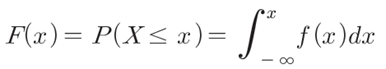

In [22]:
# 불공정한 룰렛의 확률분포에 대한 누적 분포 분포함수 구현
# 확률밀도함수(f(x)로 정의했음)
def F(x) :
    return integrate.quad(f,-np.inf,x)[0]

In [23]:
# 불공정한 룰렛의 값이 0.6 이하일 확률
F(0.6)

0.360

- 룰렛 0.4에서 0.6 사이의 값을 취할 확률

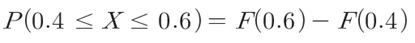

In [24]:
F(0.6)  # 불공정한 룰렛의 값이 0.6 이하일 확률
F(0.4)  # 불공정한 룰렛의 값이 0.4 이하일 확률
F(0.6)-F(0.4)

0.360

0.160

0.200

- 위 분포 함수 F(x)를 그래프로 그려보면 반드시 단조 증가함수(x가 증가할 때 y는 감소하지 않는 함수)가 됨

(-0.100, 1.100)

(-0.100, 1.100)

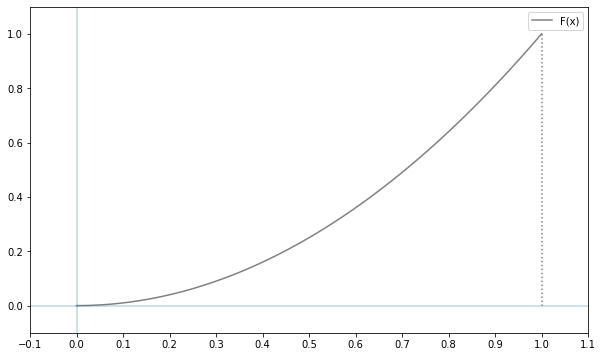

In [25]:
# 단조 증가 함수확인

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률분포의 지표

#### 평균 - 기댓값
- 확률밀도함수 f(x)를 가중치로 하여 모든 가능한 표본 x를 적분한 값
- 적분 면적으로 계산
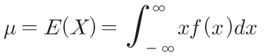

In [26]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
# (xf(x)) 계산 코드 - 가중치 적용
def integrand(x) : 
    return x * f(x)

In [27]:
# 불공정 룰렛의 기대값
integrate.quad(integrand,-np.inf, np.inf)[0]

#기대값 계산(확률은 적분면적으로 계산)

0.667

In [28]:
X  # 불공정한 룰렛 확률분포 변수

[array([0, 1]), <function __main__.f(x)>]

In [29]:
# 기대값 함수
def E(X, g=lambda x: x) :  # 기대값 함수
    x_range, f = X
    def integrand(x) :
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [30]:
E(X)

0.667

In [31]:
# 확률변수변환시 기대값
# x = 2*x+3 으로 확률변수 변환
E(X, g=lambda x: 2*x+3)

4.333

In [32]:
2*E(X)+3

4.333

### 연속형 확률변수의 확률변환에 대한 기대값의 특징
- 확률변환한 확률변수의 기대값은
    - 변환하기전 확률변수의 기대값을 이용해 변환해도 동일한 결과가 나옴
- 이산형 확률변수 변환의 기대값의 특징과 동일

#### 분산
-  μ 는 확률변수 X의 기대값
- 기댓값과 x의 차이에 대한 의미 포함
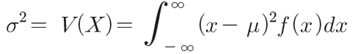


In [33]:
# 불공정한 룰렛 확률 분포 변수X의 분산 계산 함수
mean=E(X) # 기댓값 계산

def inter_V(x) : 
    return (x-mean)**2 * f(x)

integrate.quad(inter_V, -np.inf, np.inf)[0]

0.056

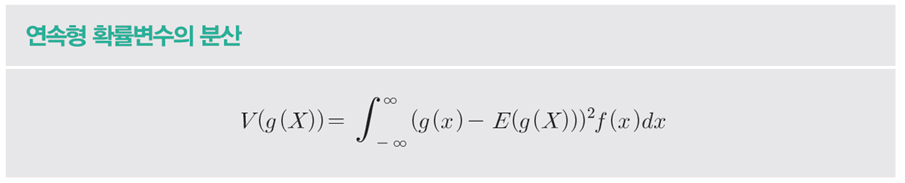

- 연속확률변수의 분산은 평균으로부터 표본 데이터까지 거리의 제곱을 확률밀도함수 f(x)로 가중하여 적분한 값
- 위 수식을 함수로 구현

In [34]:
def V(X, g=lambda x:x) :
    x_range, f = X
    mean = E(X, g)
    def integrand(x) :
        return (g(x)-mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

### X : [array([0, 1]), <function __main__.f(x)>]

In [35]:
V(X)

0.056

In [36]:
# 확률변환변수(2x+3)의 분산
V(X, lambda x:2*x+3)

0.222

### 확률변수 X의 변환변수 aX+b 가 있다면
- V(aX+b) == a**2V(X)
- 확률변수의 분산의 공식

In [37]:
# 이산형 확률변수에서 확인했던 분산의 성질에 따라 아래 수식으로도 계산 가능
# 확률변환변수(2x+3)의 분산을 분산공식으로 계산
2**2*V(X)

0.222